# Hands On Session: Dimensionality Reduction, Principal Components Analysis (PCA), and Singular Value Decomposition (SVD)
# By: Sabera Talukder

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cheninstitutecaltech/Caltech_DATASAI_Neuroscience_23/blob/main/07_10_23_day1_ethics_regression/code/diy_notebooks/dimensionality_reduction.ipynb)

In [1]:
# All Imports - alphabetically ordered with shortcuts
import matplotlib.pyplot as plt
import numpy as np
import time

from mpl_toolkits import mplot3d
from numpy.linalg import svd
from scipy.io import loadmat
from sklearn.decomposition import PCA

# Data Exploration

## Hint: do not reinvent the wheel! If you want to do something, a preexisiting package, library, function, etc. exists to do what you want. Google & Stack Overflow are your friends

## Load Data
### Dataset background: today we'll be working with calcium imaging data from one male mouse. We have already converted the calcium imaging videos into continuous neural signals, so you don't have to worry about it. The male mouse has different visitors in his cage throughout the recording, and we'll explore dimensionality reduction by determining if it's engaging in mating or aggression!

<center><img src="https://drive.google.com/uc?export=view&id=1ts_czT8HluZHqnr1cIUj1BNkwRfjWZoj
" alt="EMFigure" width="500"><center>

#### Let's start by loading in our dataset!

In [2]:
!wget https://raw.githubusercontent.com/cheninstitutecaltech/Caltech_DATASAI_Neuroscience_23/main/07_10_23_day1_ethics_regression/data/hypothalamus_calcium_imaging_remedios_et_al.mat?raw=true
!mv hypothalamus_calcium_imaging_remedios_et_al.mat\?raw\=true hypothalamus_calcium_imaging_remedios_et_al.mat

hypothalamus_data = loadmat('hypothalamus_calcium_imaging_remedios_et_al.mat')

--2023-08-18 18:35:54--  https://raw.githubusercontent.com/cheninstitutecaltech/Caltech_DATASAI_Neuroscience_23/main/07_10_23_day1_ethics_regression/data/hypothalamus_calcium_imaging_remedios_et_al.mat?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16508091 (16M) [application/octet-stream]
Saving to: ‘hypothalamus_calcium_imaging_remedios_et_al.mat?raw=true’

hypothalamus_calciu 100%[===================>]  15,74M  33,6MB/s    in 0,5s    

2023-08-18 18:35:56 (33,6 MB/s) - ‘hypothalamus_calcium_imaging_remedios_et_al.mat?raw=true’ saved [16508091/16508091]



## How many data arrays are contained in hypothalamus_data?
#### Hint: what happens if you type the variable name in a cell and run the cell?

In [3]:
# Enter code here:
hypothalamus_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jun 27 10:14:33 2022',
 '__version__': '1.0',
 '__globals__': [],
 'attack_vector': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'neural_data': array([[-0.88539819, -0.80569246, -0.73758439, ..., -0.98890073,
         -1.03551113, -0.99196781],
        [-0.14700497, -0.32165216, -0.33878817, ...,  3.78779148,
          3.83222242,  3.85200285],
        [-1.19636847, -1.18637515, -1.16444654, ..., -0.34082998,
         -0.39085209, -0.38183045],
        ...,
        [-1.07157774, -0.58209432, -0.17334395, ..., -0.8675362 ,
         -0.87503357, -1.08967763],
        [ 1.82225675,  1.30727208,  1.03393152, ...,  1.30556881,
          1.41885948,  0.99312731],
        [ 0.5958771 ,  0.36866712,  0.28664763, ...,  1.78433094,
          1.47429182,  1.85403792]]),
 'sex_vector': array([[1, 1, 1, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
hypothalamus_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'attack_vector', 'neural_data', 'sex_vector'])

## Extract the N data arrays into N separate variables.

In [44]:
# Enter code here:
neural_data=hypothalamus_data['neural_data']
attack_vector=hypothalamus_data['attack_vector']
sex_vector=hypothalamus_data['sex_vector']

## What is the dimensionality of each of the N data arrays?
## What do you think the dimensions represent?

In [7]:
# Enter code here:
print(neural_data.shape)
print(attack_vector.shape)
print(sex_vector.shape)

(115, 18561)
(1, 18561)
(1, 18561)


In [48]:
sex_vector

array([[1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

## Visualize the distributions of each of the N data arrays as a histogram!
#### Hint: the answer to this question can be a picture!
#### Hint Hint: sometimes functions run faster if you transform a matrix a vector first.

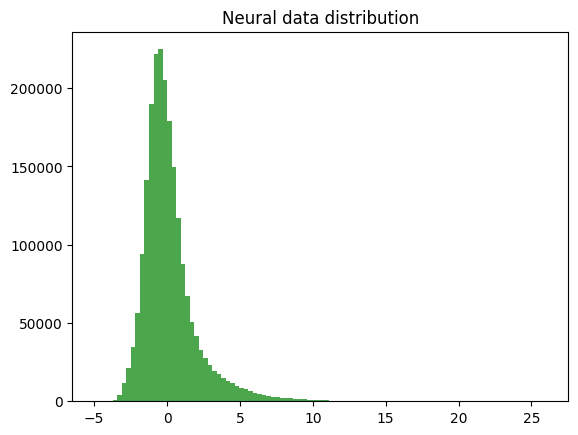

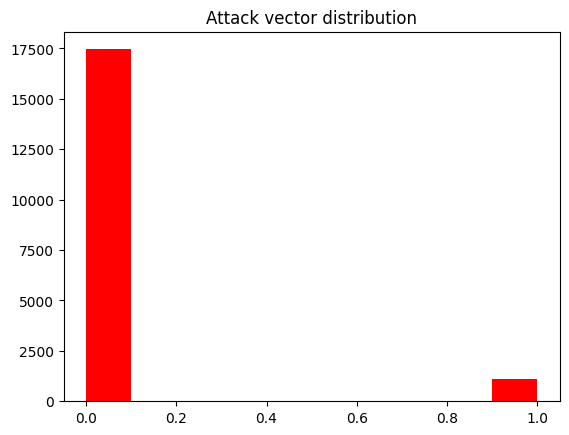

Text(0.5, 1.0, 'Sex vector distribution')

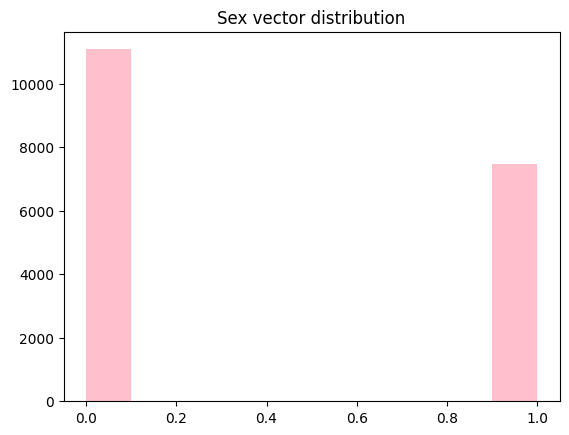

In [16]:
# Enter code here:
plt.hist(neural_data.flatten(),bins=100, color='green',alpha=0.7)
plt.title('Neural data distribution')
plt.show()
plt.hist(attack_vector.flatten(), color='red')
plt.title('Attack vector distribution')
plt.show()
plt.hist(sex_vector.flatten(), color='pink')
plt.title('Sex vector distribution')

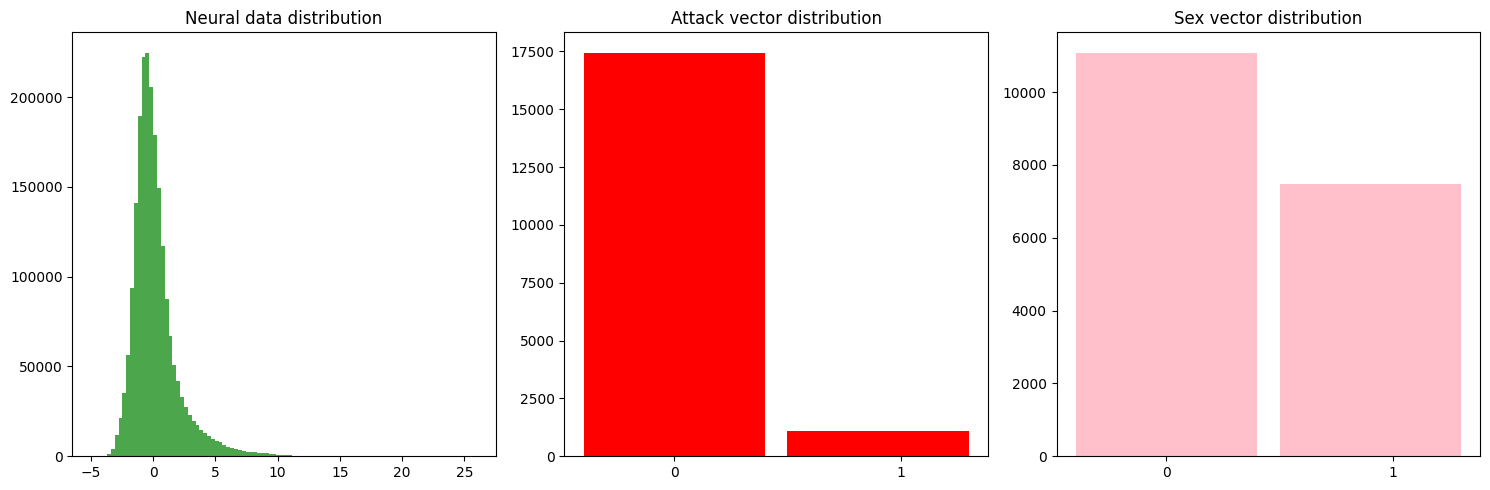

In [38]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
axes[0].hist(neural_data.flatten(), bins=100, color='green', alpha=0.7)
axes[0].set_title('Neural data distribution')

# Plot 2
hist_values, bins = np.histogram(attack_vector.flatten())

# Plot 2 as a bar chart
axes[1].bar(bins[:-1], hist_values, width=0.8, color='red', align='center')
axes[1].set_title('Attack vector distribution')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])

# Plot 3
hist_values_sex, bins_sex = np.histogram(sex_vector.flatten())

# Plot 2 as a bar chart
axes[2].bar(bins_sex[:-1], hist_values_sex, width=0.8, color='pink', align='center')
axes[2].set_title('Sex vector distribution')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['0', '1'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Plot the N data arrays.
#### Hint: sometimes the most expeditious way to visualize data is to treat it as an image!
#### Hint Hint: one visualization might give you something you dont expect, but is the problem the data?

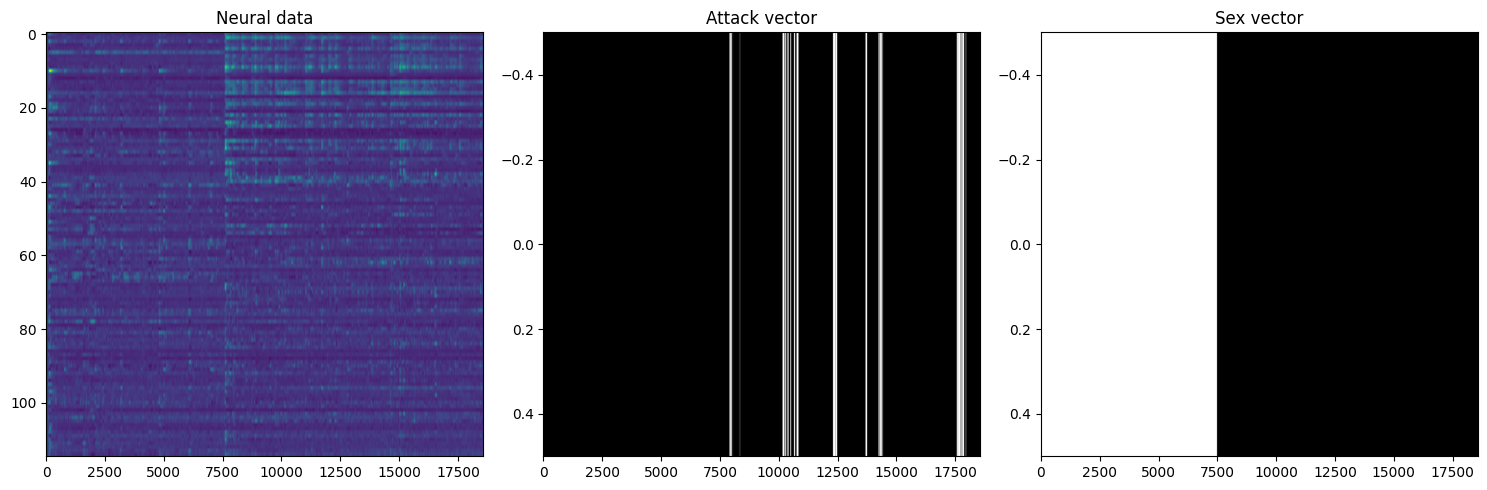

In [49]:
# Enter code here:
# Sample data (replace this with your actual data)
#neural_data = np.random.rand(115, 18000)  # Example random data

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the neural_data as an image with adjusted aspect ratio
img = axes[0].imshow(neural_data, aspect='auto')  # 'auto' adjusts aspect ratio

axes[0].set_title('Neural data')

img2 = axes[1].imshow(attack_vector, aspect='auto',cmap='gray')  # 'auto' adjusts aspect ratio

axes[1].set_title('Attack vector')

img2 = axes[2].imshow(sex_vector, aspect='auto',cmap='gray')  # 'auto' adjusts aspect ratio

axes[2].set_title('Sex vector')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## What do the values inside the arrays represent?

In [50]:
# Enter answer here (code can be used, but not required):
#Neural data is calcium imaging data from 115 neurons
#Attack vector has value 1 whenever the mouse engaged in attack behavior-- attacks only happen when sex vector is 0,
#ie the mouse is male
#Sex vector is 1 for female nest mates and 0 for male nest mates

### Great job exploring the data! Now let's dive into what we can do with it!

# Dimensionality Reduction

## Prinicpal Components Analysis (PCA)
#### We're going to dive into how PCA works, but first we're going to see what can be done with it! All you need to know for now is that PCA creates a lower dimensional representation of your data to preserve the data's variance.

#### By now you know you have a neural data array that is number_of_neurons by time, let's say the dimensionality is NxT. What we are going to do with PCA is take all of our time steps and compress them; this will output an array that is SxT where S < N. In other words each time step is initially an N dimensional vector, that gets compressed into an S dimensional vector where S < N. Let's explore this with S = 3.

In [51]:
# make a PCA model with with S = 3
pca_model_s_3 = PCA(n_components=3)

# STOP & Check Yourself: Do you know why we can just call "PCA"?

# with the PCA model instance we created to our neural data
neural_pca_s_3 = pca_model_s_3.fit_transform(neural_data.T)

## What is the dimensionality of the PCAed neural data? What do these dimensions mean?

In [52]:
# Enter code here:
print(neural_pca_s_3.shape)

(18561, 3)


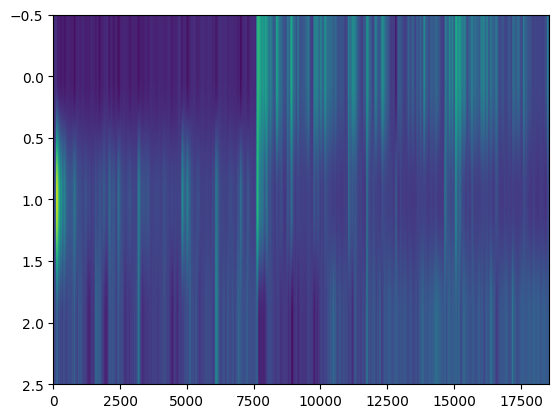

In [54]:
img = plt.imshow(neural_pca_s_3.T, aspect='auto')

## Plot the Principal Components (aka PCs) in 3D!

<IPython.core.display.Javascript object>


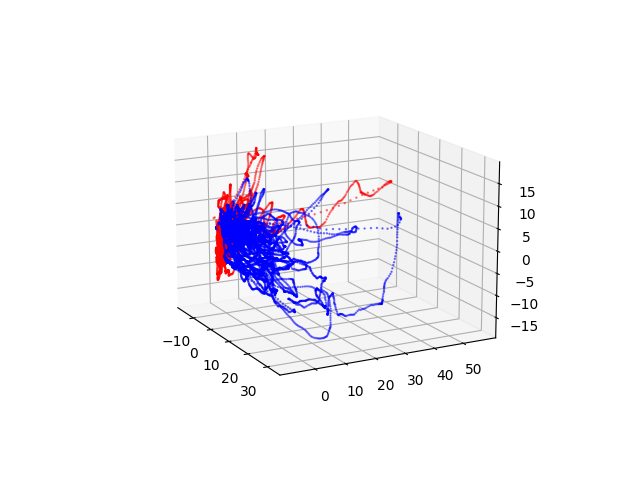

In [71]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
pc1 = neural_pca_s_3[:,0]
pc2 = neural_pca_s_3[:,1]
pc3 = neural_pca_s_3[:,2]

ax.scatter3D(pc1, pc2, pc3,alpha=0.5,s=0.5, c=sex_vector.flatten(),cmap='bwr');
plt.show()

<IPython.core.display.Javascript object>


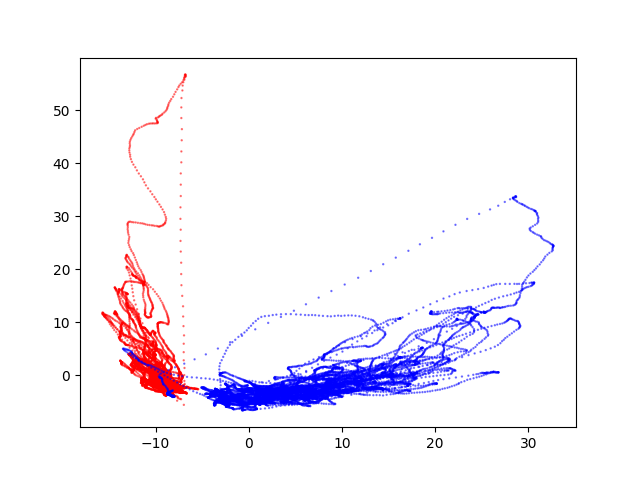

In [75]:
plt.scatter(pc1,pc2,c=sex_vector.flatten(),s=0.5,alpha=0.5, cmap='bwr')

## Nice job! Now rotate your representation! What interesting things do you notice about your dimensionality reduced data?
#### Hint: why does this data look connected?
#### Hint Hint: Why are the axes so different from each other? What do they represent?

In [1]:
# Enter answer here: PCA has discovered activity subspaces that correspond to whether a male or female mouse
#is the cagemate.

In [76]:
# do this to switch out of movable 3d plotting (i.e. when you have 2d plots next)
%matplotlib inline 

## We're going to return to this visualization, but first you have to be thinking to yourself, we got rid of A LOT of dimensions how do we know this representation is still good? 

## How much variance is explained by each of these top 3 principal components? What does this tell you about the data?
#### Hint: what is the first hint I gave you?

In [81]:
# Enter code here:
pca_model_s_3.explained_variance_ratio_

array([0.35768848, 0.13396795, 0.07023927])

## Now that you know how much variance is explained by each of the top 3 PCs, let's explore the representation we built further!

#### Let's start by coloring each time point as a function of when it appears in the time series.
#### Hint: you're not changing the plot you're changing the color!

<IPython.core.display.Javascript object>


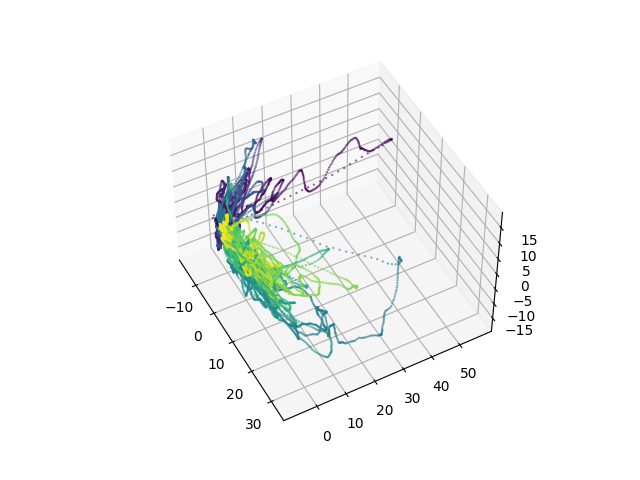

In [83]:
# Enter code here:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(pc1, pc2, pc3,alpha=0.5,s=0.5, c=np.arange(pc1.shape[0]),cmap='viridis');
plt.show()

## What does this tell you about the representation?

## Now make three separate plots colored by the attack variable! 😡🐭❓

### For plot 1: Plot only the attack data points
### For plot 2: Plot only the other data points
### For plot 3: Plot the the attack data points on top of the other data points

#### Hint: it may be easier to separate your data by labels first!
#### Hint Hint: for plot 3 play with opacity (goes by a different name though!), and zorder.

<IPython.core.display.Javascript object>


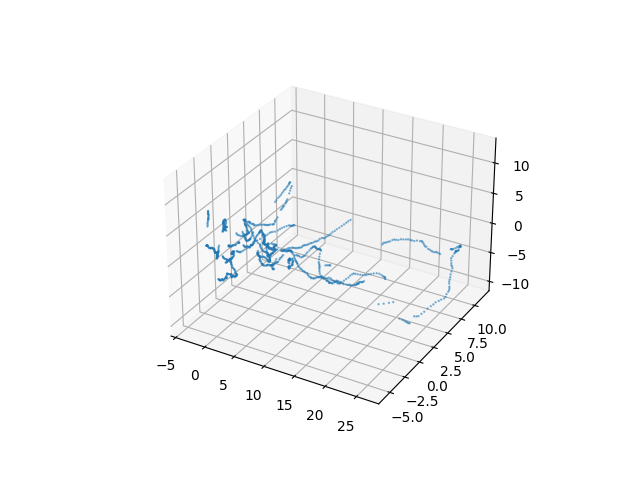

[23.58455657 23.77137505 23.87157876 ... -2.78625916 -2.59632777
 -2.50688417]


In [89]:
# Enter Code Here:
#plot one
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

attack_pc1=pc1[np.where(attack_vector.flatten()==1)]
attack_pc2=pc2[np.where(attack_vector.flatten()==1)]
attack_pc3=pc3[np.where(attack_vector.flatten()==1)]
print(attack_pc1)
ax.scatter3D(attack_pc1, attack_pc2, attack_pc3,alpha=0.5,s=0.5);
plt.show()

<IPython.core.display.Javascript object>


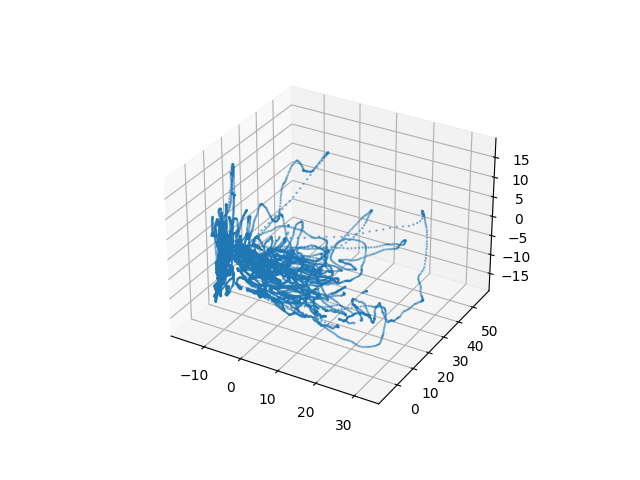

In [88]:
non_att=np.where(attack_vector.flatten()==0)
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

non_attack_pc1=pc1[non_att]
non_attack_pc2=pc2[non_att]
non_attack_pc3=pc3[non_att]

ax.scatter3D(non_attack_pc1, non_attack_pc2, non_attack_pc3,alpha=0.5,s=0.5);
plt.show()

<IPython.core.display.Javascript object>


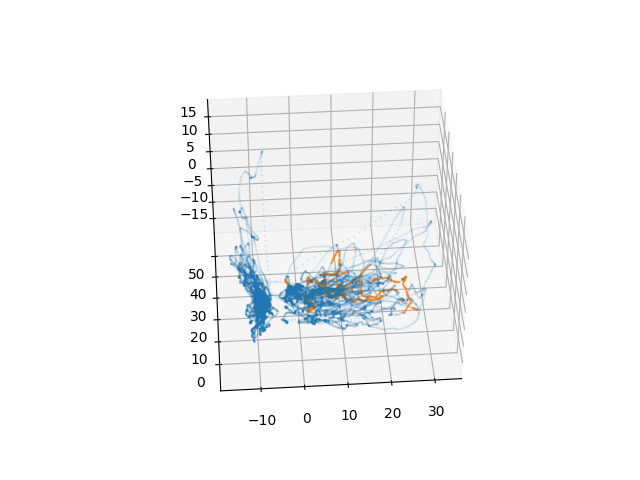

In [100]:
non_att=np.where(attack_vector.flatten()==0)
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

non_attack_pc1=pc1[non_att]
non_attack_pc2=pc2[non_att]
non_attack_pc3=pc3[non_att]

ax.scatter3D(non_attack_pc1, non_attack_pc2, non_attack_pc3,alpha=0.1,s=0.5);
ax.scatter3D(attack_pc1, attack_pc2, attack_pc3,alpha=0.5,s=0.6);
plt.show()

## Now build the same plot but color based on the mouse intruder sex variable! 🐭❓

<IPython.core.display.Javascript object>


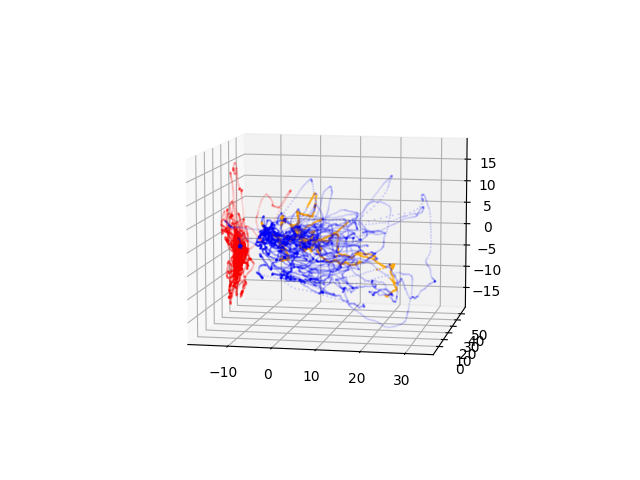

In [99]:
non_att=np.where(attack_vector.flatten()==0)
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

sex_c=sex_vector.flatten()[non_att]

ax.scatter3D(non_attack_pc1, non_attack_pc2, non_attack_pc3,alpha=0.1,s=0.5, c=sex_c,cmap='bwr');
ax.scatter3D(attack_pc1, attack_pc2, attack_pc3,alpha=0.5,s=0.6, color='orange');
plt.show()

## Great! Now that you know more about the data and PCA, I want you to repeat everything you just did if you reduce the data to 2 PCs! More explicitly:

#### ✦ Train a model on the neural data with 2 PCs.
#### ✦ How much explained variance do these 2 PCs capture? Do you notice anything interesting about these 2 PCs? 😉
#### ✦ How is time visualized in these 2 PCs?
#### ✦ How is aggression (🐭 😡) visualized in these 2 PCs?
#### ✦ How is intruder sex (🐭 ❤️) visualized in these 2 PCs?

### Finally, if you needed to build a model to classify time, attack, or the visitor's sex how many PCs would you use? Do you lose anything between 3 PCs and 2PCs?

In [ ]:
# Enter Code Here:

# Implement PCA yourself!!

## First, mean center your data!
##### The reason we didn't have to do this before is because the PCA function we called automatically did this for us 😱

In [ ]:
# Enter code here:

#### Now verify that the pca function returns the same thing in 2D for the not mean centered data and the mean centered data to prove that function we call automatically does this for us. Color using the time steps!

In [ ]:
# Enter Code Here:

## Now that we have mean centered data we can transform our data via two paths:
### (1) By stepping through linear decomposition ourselves.
### (2) By using singular value decomposition (a.k.a SVD).

#### Let's start with path (1):
#### First calculate the covariance matrix of your mean centered data.

In [ ]:
# Enter code here:

#### Compute the eigenvalues and eigenvectors of the covariance matrix.
##### Hint: Make sure you've sorted the eigenvalues and eigenvectors to be in either ascending or descending order!

In [ ]:
# Enter code here:

#### Now project your mean centered data into a reduced space using the 2 largest eigenvectors.

In [ ]:
# Enter code here:

#### Plot your transformed data using time as your color!

In [ ]:
# Enter code here:

#### Ok but why is the representation flipped?!
#### PCA is sign invariant, meaning that we can multiply the axes by -1 and the interpretation of the dimensionality reduced space stays the same. 
#### Now that we know this is true, change your plot to look like the plot when we use the PCA library directly.

In [ ]:
# Enter Code Here:

## Great Job!! Now you've calculated PCA all by yourself using matrix operations! Let's move on to implementing PCA using SVD (singular vector decomposition).

#### Singular vector decomposition is a method that decomposes a matrix into three matricies. U, S, and Vt. The left singular vectors are the columns of U. S are the singular values. V is a matrix whose columns are the right singular vectors. Vt is the transpose of V. Our input data (call it X) equals U\*S\*Vt ➡️ X = U\*S\*Vt.

#### We're not going to implement svd ourselves. Please run np.linalg's svd on our mean centered data.
##### Hint: have we already loaded svd?
##### Hint Hint: run with full_matrices = False otherwise it might take you a while!

In [2]:
# Enter code here:

#### What are the dimensions of U, S, and Vt? 

In [ ]:
# Enter code here:

#### Because we used the data we want transformed to calculate U, S, and Vt, we can directly multiply our left singular vectors and singular values together to get our transformed data.

#### Hint: the singular values need to be converted into a diagonal matrix to make the matrix multiplication easier.
#### Hint Hint: We only want to transform our data to a reduced dimension of 2!

In [ ]:
# Enter Code Here:

#### Plot your transformed data to match our PCA library plot.

In [ ]:
# Enter code here:

# To dive deeper into the math behind PCA & SVD stay tuned for day 3!!